In [6]:
#IMPORTING DATASET(.CSV) INTO PANDAS DATAFRAME
import alt as alt
import pandas as pd

dataset1 = pd.read_csv('01_april_30_covid_impact_survey.csv',
                       sep=',',
                       index_col=False,
                       dtype='unicode')
dataset1.columns = map(str.upper, dataset1.columns)

dataset2 = pd.read_csv('02_May_12_covid_impact_survey.csv',
                       sep=',',
                       index_col=False,
                       dtype='unicode')

dataset3 = pd.read_csv('03_june_9_covid_impact_survey.csv',
                       sep=',',
                       index_col=False,
                       dtype='unicode')
dataset3.columns = map(str.upper, dataset3.columns)

#Selected Features
selected_features = ['SOC1','SOC2A','SOC2B','SOC3A','SOC3B','SOC4A','SOC4B',
                      'SOC5A','SOC5B','SOC5C','SOC5D','SOC5E',
                      'PHYS1A','PHYS1B','PHYS1C','PHYS1D','PHYS1E','PHYS1F','PHYS1G','PHYS1H','PHYS1I','PHYS1J','PHYS1K','PHYS1L','PHYS1M','PHYS1N','PHYS1O','PHYS1P','PHYS1Q',
                      'PHYS2_1','PHYS2_2','PHYS2_3','PHYS2_4','PHYS2_5','PHYS2_6','PHYS2_7','PHYS2_8','PHYS2_9','PHYS2_10','PHYS2_11','PHYS2_12','PHYS2_13','PHYS2_14','PHYS2_15','PHYS2_16','PHYS2_17','PHYS2_18','PHYS2_19',
                      'PHYS7_1','PHYS7_2','PHYS7_3','PHYS7_4',
                      'PHYS8',
                      'PHYS10A','PHYS10B','PHYS10C','PHYS10D','PHYS10E',
                      'AGE7','GENDER','RACETH','ECON4A','ECON4B','HHINCOME','EDUCATION','HHSIZE1','HH_BANNER',
                      ]


df1 = dataset1[selected_features]
df1.dropna(inplace=True)
df2 = dataset2[selected_features]
df2.dropna(inplace=True)
df3 = dataset3[selected_features]
df3.dropna(inplace=True)

df = df1.append(df2,ignore_index = True).append(df3,ignore_index = True)
# df.isna().sum()

#Exporting Selected Features from datasets
from pathlib import Path

filepath1 = Path('C:\python\df1.csv')
filepath1.parent.mkdir(parents=True, exist_ok=True)
df1.to_csv(filepath1)

filepath2 = Path('C:\python\df2.csv')
filepath2.parent.mkdir(parents=True, exist_ok=True)
df2.to_csv(filepath2)

filepath3 = Path('C:\python\df3.csv')
filepath3.parent.mkdir(parents=True, exist_ok=True)
df3.to_csv(filepath3)

filepath = Path('C:\python\df.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
df.to_csv(filepath)

C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_38152\919149335.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)
C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_38152\919149335.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace=True)
C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_38152\919149335.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.dropna(inplace=True)
C:\User

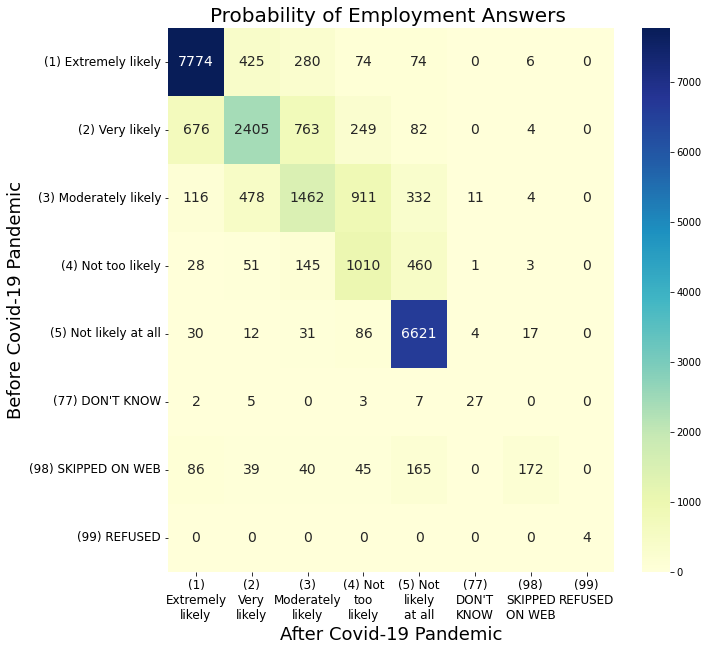

In [3]:
#SE1: Changes in Social Relationships Before(SOC2B) and After(SOC2A) Covid Pandemic
import matplotlib.pyplot as plt
import seaborn as sns

import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

SE1 = pd.crosstab(df['ECON4B'],
                  df['ECON4A'],
                 margins = False)

fig, ax = plt.subplots(figsize=(10, 10))
s= sns.heatmap(SE1, annot=True,fmt='g',annot_kws={"size": 14},cmap="YlGnBu")
# s.set(xlabel='Social Relationships (After Covid Pandemic)', ylabel='Social Relationships (Before Covid Pandemic')
s.axes.set_title("Probability of Employment Answers ",fontsize=20)
s.set_xlabel("After Covid-19 Pandemic",fontsize=18)
s.set_ylabel("Before Covid-19 Pandemic",fontsize=18)
s.set_xticklabels(s.get_xmajorticklabels(), fontsize = 12 , rotation=45)
s.set_yticklabels(s.get_ymajorticklabels(), fontsize = 12 )
wrap_labels(s, 7)
s.figure
# s.set_xyicklabels(s.get_jmajorticklabels(), fontsize = 14,rotation=45)
plt.savefig("C:\python\SE07-CROS.png",
            format='png',
            dpi=600,
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

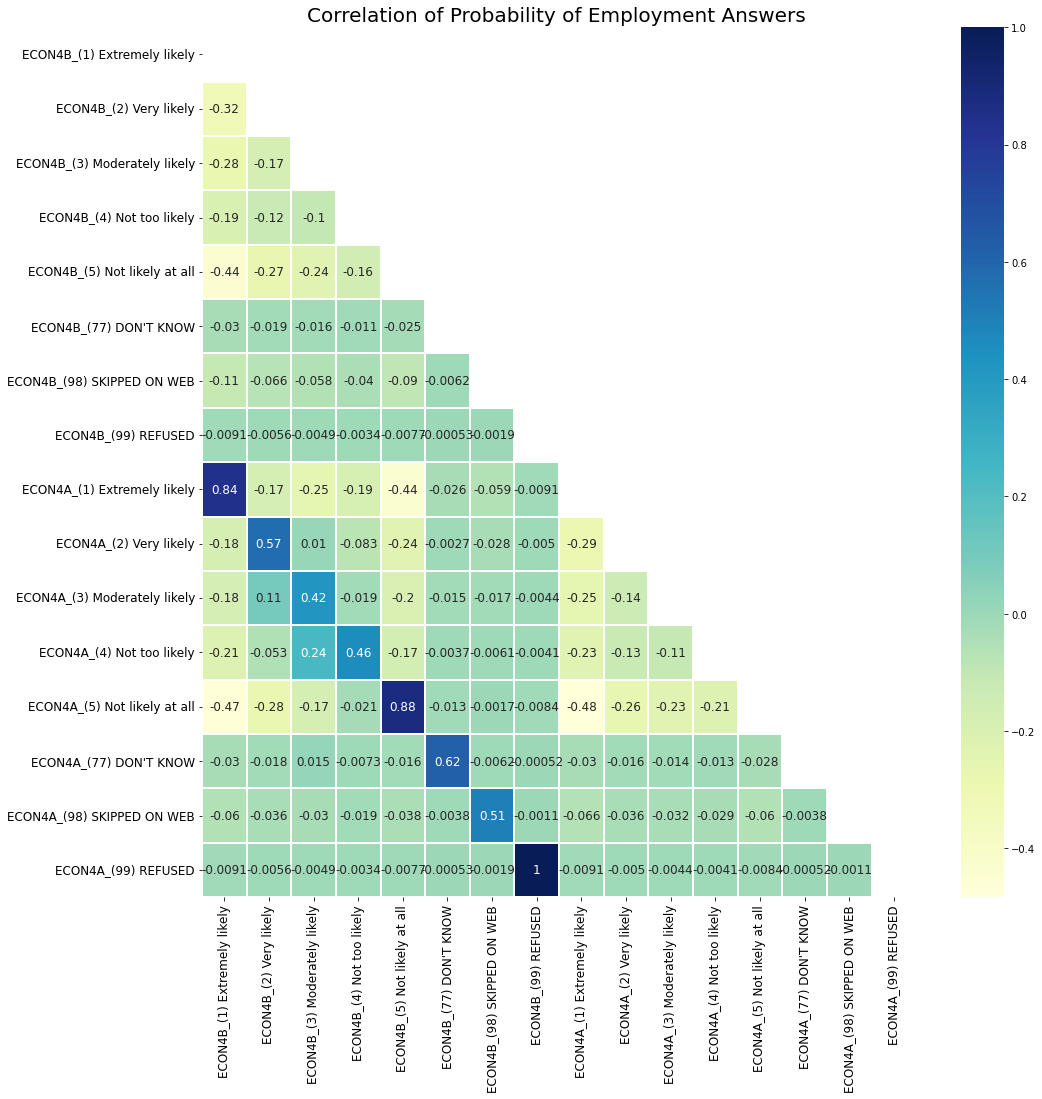

In [4]:
import numpy as np
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

SE1 = pd.get_dummies(df[['ECON4B','ECON4A']])
plt.figure(figsize=(16,16))

SE1_CORR = SE1.corr()
matrix = np.triu(SE1_CORR)
s=sns.heatmap(SE1_CORR,linewidths=.1,cmap="YlGnBu", annot=True, mask=matrix,annot_kws={"size": 12})
s.set_xticklabels(s.get_xmajorticklabels(), fontsize = 12 , rotation=90)
s.set_yticklabels(s.get_ymajorticklabels(), fontsize = 12)
s.axes.set_title("Correlation of Probability of Employment Answers ",fontsize=20)
# wrap_labels(s, 4)
# plt.yticks(rotation=0);
plt.savefig("C:\python\SE07-CORS.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

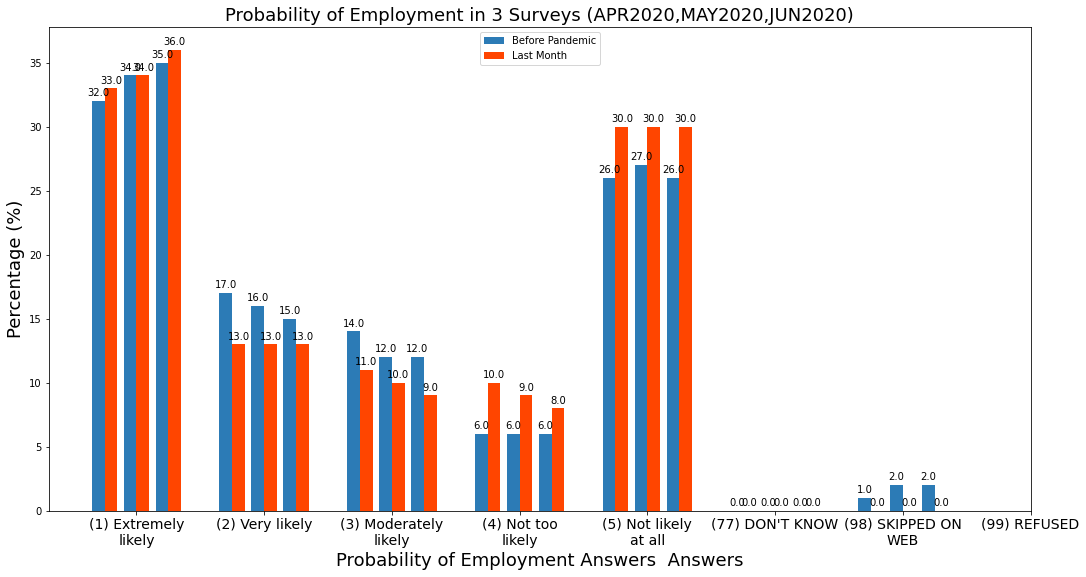

In [5]:
se1_1=df1[['ECON4B','ECON4A']]


data1B=se1_1['ECON4B'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='april_before')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

data1A=se1_1['ECON4A'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='april_after')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

se1_2=df2[['ECON4B','ECON4A']]
data2B=se1_2['ECON4B'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='may_before')\
    .sort_values('unique_values')\
    .reset_index(drop=True)
data2A=se1_2['ECON4A'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='may_after')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

se1_3=df3[['ECON4B','ECON4A']]
data3B=se1_3['ECON4B'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='june_before')\
    .sort_values('unique_values')\
    .reset_index(drop=True)
data3A=se1_3['ECON4A'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='june_after')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

data1 = pd.concat([data1B,data1A['april_after'],data2B['may_before'],data2A['may_after'],data3B['june_before'],data3A['june_after']], axis = 1)
data1.drop(data1.tail(1).index,inplace=True)

x= data1.iloc[: , 1:]*100
x= x.astype(float).astype(int)
# x=int(x)
# df['col'] = df['col'].str.split('.').str[0]
# x.astype(int)
data1 = pd.concat([data1B['unique_values'],x], axis = 1)


import matplotlib.pyplot as plt
import numpy as np

labels = data1['unique_values']
APR_BEFORE_PANDEMIC = data1['april_before']
APR_LAST_MONTH = data1['april_after']
MAY_BEFORE_PANDEMIC = data1['may_before']
MAY_LAST_MONTH = data1['may_after']
JUN_BEFORE_PANDEMIC = data1['june_before']
JUN_LAST_MONTH = data1['june_after']

def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 8))
rects1 = ax.bar(x - width*3 , APR_BEFORE_PANDEMIC, width,color='#2C7BB6', label='Before Pandemic')
rects2 = ax.bar(x - width*2, APR_LAST_MONTH, width,color='#FF4500', label='Last Month')
rects3 = ax.bar(x - width/2 , MAY_BEFORE_PANDEMIC, width,color='#2C7BB6')
rects4 = ax.bar(x + width/2, MAY_LAST_MONTH, width,color='#FF4500')
rects5 = ax.bar(x + width*2, JUN_BEFORE_PANDEMIC, width,color='#2C7BB6')
rects6 = ax.bar(x + width*3, JUN_LAST_MONTH, width,color='#FF4500')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage (%)',fontsize=18)
ax.set_xlabel('Probability of Employment Answers  Answers',fontsize=18)
ax.set_title('Probability of Employment in 3 Surveys (APR2020,MAY2020,JUN2020)',fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)
wrap_labels(ax, 15)

fig.tight_layout()
plt.xticks(fontsize=14)
# plt.xticks(fontsize=7 , rotation=45)
plt.show()

fig.savefig('C:\python\SE07-BARS.png',format='png', dpi=600)

In [7]:
SE1 = pd.crosstab(df['ECON4B'],
                  df['ECON4A'],
                 margins = False)


filepath = Path('C:\python\se7_heatmap.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
SE1.to_csv(filepath)

SE1

ECON4A,(1) Extremely likely,(2) Very likely,(3) Moderately likely,(4) Not too likely,(5) Not likely at all,(77) DON'T KNOW,(98) SKIPPED ON WEB,(99) REFUSED
ECON4B,,,,,,,,
(1) Extremely likely,7774,425,280,74,74,0,6,0
(2) Very likely,676,2405,763,249,82,0,4,0
(3) Moderately likely,116,478,1462,911,332,11,4,0
(4) Not too likely,28,51,145,1010,460,1,3,0
(5) Not likely at all,30,12,31,86,6621,4,17,0
(77) DON'T KNOW,2,5,0,3,7,27,0,0
(98) SKIPPED ON WEB,86,39,40,45,165,0,172,0
(99) REFUSED,0,0,0,0,0,0,0,4
